In [47]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import requests
import lxml
import re
import matplotlib.pyplot as plt

## Meeting Plan for Nicolas Ouellet and Benedicte Knudson:
We collaborated over Zoom and in person **six** times, worked individually a handful of other times, and used a shared Github Repository that can be found [here](https://github.com/NickOuellet/Fly-Me-To-The-Moon). <br />
We met: <br />
10/11: 5pm-7pm <br />
10/20: 10am-12pm <br />
10/21: 7-11pm <br />
10/25: 7-10pm <br />

11/9: 8-10:30pm<br />
11/10: 8-10:30pm<br />

___


## Step 1 - Scrape SpaceWeatherLive.com

In [48]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
r = requests.get("https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html",timeout=10,headers=headers)
r.status_code

200

In [49]:
text_response = r.content #https://stackoverflow.com/questions/52389692/beautifulsoup-and-prettify-function
soup = BeautifulSoup(text_response,"html.parser")

In [50]:
table = soup.findAll("table") #find the table in the HTML

In [51]:
solar_flare_df = pd.read_html(str(table))

In [52]:
solfla_df = solar_flare_df[0]#works when we just select the first table

In [53]:
solfla_df.columns = ["rank", "x_class", "date", "region", "start_time", "maximum_time", "end_time", "movie"] #rename columns to be more descriptive

In [54]:
solfla_df

,rank,x_class,date,region,start_time,maximum_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


___
## Step 2 - Tidy the Top 50 Solar Flare Data

In [55]:
solfla_df = solfla_df[["rank", "x_class", "date", "start_time", "maximum_time", "end_time","region"]]
solfla_df.head()

,rank,x_class,date,start_time,maximum_time,end_time,region
0,1,X28+,2003/11/04,19:29,19:53,20:06,486
1,2,X20+,2001/04/02,21:32,21:51,22:03,9393
2,3,X17.2+,2003/10/28,09:51,11:10,11:24,486
3,4,X17+,2005/09/07,17:17,17:40,18:03,808
4,5,X14.4,2001/04/15,13:19,13:50,13:55,9415


In [56]:
import datetime

In [57]:
solfla_df.loc[:,"start_time"] = pd.to_datetime(solfla_df.loc[:,"date"] + " " + solfla_df.loc[:,"start_time"])
solfla_df.loc[:,"maximum_time"] = pd.to_datetime(solfla_df.loc[:,"date"] + " " + solfla_df.loc[:,"maximum_time"])
solfla_df.loc[:,"end_time"] = pd.to_datetime(solfla_df.loc[:,"date"] + " " + solfla_df.loc[:,"end_time"])

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [58]:
solfla_df.drop(columns="date",inplace=True) #drop date table
solfla_df.rename(columns={"start_time":"start_datetime", "end_time":"end_datetime","maximum_time":"maximum_datetime"},inplace=True)
solfla_df.head()

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,rank,x_class,start_datetime,maximum_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415


In [59]:
def remove_plus(string):
  return re.sub("\+", "", string,1)

def make_float(string): #make all number values in rating into floats to make searching easier later
  rating = string[0]
  string = string[1:]
  new_float = float(string)
  return rating + str(new_float)
 
solfla_df["x_class"] = solfla_df["x_class"].apply(remove_plus)
solfla_df["x_class"] = solfla_df["x_class"].apply(make_float)

/tmp/ipykernel_109/2743329783.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solfla_df["x_class"] = solfla_df["x_class"].apply(remove_plus)
/tmp/ipykernel_109/2743329783.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solfla_df["x_class"] = solfla_df["x_class"].apply(make_float)


In [60]:
solfla_df.dtypes

rank                         int64
x_class                     object
start_datetime      datetime64[ns]
maximum_datetime    datetime64[ns]
end_datetime        datetime64[ns]
region                       int64
dtype: object

In [61]:
solfla_df

,rank,x_class,start_datetime,maximum_datetime,end_datetime,region
0,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


___
## Step 3 - Scrape the NASA Data

In [62]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
r = requests.get("https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html",timeout=10,headers=headers)
r.status_code

200

In [63]:
text_response = r.content #https://stackoverflow.com/questions/52389692/beautifulsoup-and-prettify-function
soup = BeautifulSoup(text_response,"html.parser")
table = soup.get_text()
split_table = table.splitlines()
split_table = split_table[15:]
split_table = split_table[0:len(split_table)-2] #clean up table by removing top and bottom portion

In [64]:
nasa_df = pd.DataFrame( #create empty DF 
    columns = ["start_date","start_time","end_date","end_time","start_freq","end_freq","location","region","xray_importance","cme_date","cme_time","central_pos_angle","cpa_width","cme_speed","PHTX" ]
    )
for i,v in enumerate(split_table): 
  row_vals = re.findall(r"\S+",v)
  nasa_df.loc[i] = row_vals[0:15] #assign values for each row from list after splitting string into a list var, also drop 16th entry because sometimes it is useless notation

In [65]:
naas_df = nasa_df.reindex(columns=["cme_date","cme_time","central_pos_angle","end_date","end_freq","end_time","location","region","xray_importance","cme_speed","start_date", "start_time", "start_freq","cpa_width","PHTX"])
nasa_df

,start_date,start_time,end_date,end_time,start_freq,end_freq,location,region,xray_importance,cme_date,cme_time,central_pos_angle,cpa_width,cme_speed,PHTX
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,----,09/17,12:00,Halo,360,1385,PHTX
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,----,10/18,08:00,85,146,1001,PHTX
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692,PHTX
520,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,-----,M4.4,11/29,13:25,Halo,360,2077,----


In [66]:
nasa_df.drop(columns=["PHTX"],inplace=True) #drop links column

In [67]:
nasa_df

,start_date,start_time,end_date,end_time,start_freq,end_freq,location,region,xray_importance,cme_date,cme_time,central_pos_angle,cpa_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,----,09/17,12:00,Halo,360,1385
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,----,10/18,08:00,85,146,1001
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692
520,2020/11/29,13:07,11/29,15:23,14000,850,S23E89,-----,M4.4,11/29,13:25,Halo,360,2077


___
## Step 4 - Tidy the Nasa Data

**Replace all empty values with NaNs**

In [68]:
nasa_df.region.replace("-----", np.nan,inplace=True)
nasa_df.xray_importance.replace("----", np.nan,inplace=True)
nasa_df.cme_date.replace("--/--",np.nan, inplace=True)
nasa_df.cme_time.replace("--:--",np.nan,inplace=True)
nasa_df.central_pos_angle.replace("----", np.nan,inplace=True)
nasa_df.cpa_width.replace("----", np.nan,inplace=True)
nasa_df.cpa_width.replace("---", np.nan,inplace=True)
nasa_df.cpa_width.replace("360h", "360",inplace=True)
nasa_df.cme_speed.replace("----", np.nan,inplace=True)
nasa_df.start_freq.replace("????",np.nan,inplace=True)
nasa_df.end_freq.replace("????",np.nan,inplace=True)

**Replace all lower case "Back" values with upper case "BACK" in location column**

In [69]:
nasa_df.location.replace("Back","BACK",inplace=True)

**Replace all DSF values with FILA in region column**

In [70]:
nasa_df.region.replace("DSF","FILE",inplace=True)

**Create column to indicate HALO flare, then turn Halo entries into NaN**<br/>
Halo = 1 <br/>
Non-Halo = 0

In [71]:
column_vals = []
for index,value in nasa_df["central_pos_angle"].iteritems():
  if value == "Halo":
    column_vals.append(True)
  else:
    column_vals.append(False)
nasa_df["is_halo"] = column_vals

In [72]:
nasa_df.central_pos_angle.replace("Halo", np.nan,inplace=True)

**Indicate which cpa_widths are lower bounds, make a new column with the info, then remove the non-numeric characters**

In [73]:
column_vals = []
for index,value in nasa_df["cpa_width"].iteritems():
  if pd.isnull(value) == True:
    column_vals.append(True)
  elif ">" in value:
        column_vals.append(False)
  else:
    column_vals.append(False)
nasa_df["lower_bound"] = column_vals

In [74]:
def remove_sign(str):
  if pd.isnull(str) == True:
    return str
  return re.sub(">","",str)

nasa_df["cpa_width"] = nasa_df["cpa_width"].apply(remove_sign)

**Reformat date columns and drop repetitive data**

In [75]:
nasa_df.replace("24:00","23:59",inplace=True)

In [76]:
for index,value in nasa_df["end_date"].iteritems():
  year = nasa_df.start_date.loc[index][0:4]
  nasa_df["end_date"].loc[index] = pd.to_datetime(year + "/" + nasa_df["end_date"].loc[index] + " " + nasa_df["end_time"].loc[index])

for index,value in nasa_df["cme_date"].iteritems():
  year = nasa_df.start_date.loc[index][0:4]
  if pd.isnull(nasa_df["cme_date"].loc[index]):
    pass
  else:
    nasa_df["cme_date"].loc[index] = pd.to_datetime(year + "/" + nasa_df["cme_date"].loc[index] + " " + nasa_df["cme_time"].loc[index])

nasa_df.loc[:,"start_date"] = pd.to_datetime(nasa_df.loc[:,"start_date"] + " " + nasa_df.loc[:,"start_time"])
nasa_df.loc[:,"end_date"] = pd.to_datetime(nasa_df.loc[:,"end_date"])
nasa_df.loc[:,"cme_date"] = pd.to_datetime(nasa_df.loc[:,"cme_date"])

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [77]:
nasa_df.rename(columns={"start_date":"start_datetime", "end_date":"end_datetime","cme_date":"cme_datetime"},inplace=True) #rename columns

In [78]:
nasa_df.drop(columns=["start_time","end_time","cme_time"],inplace=True) #drop unnessecary values

In [79]:
nasa_df.start_freq = nasa_df.start_freq.astype('float') #change all str types to float
nasa_df.end_freq = nasa_df.end_freq.astype('float')
nasa_df.central_pos_angle = nasa_df.central_pos_angle.astype('float')
nasa_df.cme_speed = nasa_df.cme_speed.astype('float')
nasa_df.cpa_width = nasa_df.cpa_width.astype('float')

**Adjust xray_importance column to have 0 after "." value for easier searching later**

In [80]:
nasa_df.dtypes

start_datetime       datetime64[ns]
end_datetime         datetime64[ns]
start_freq                  float64
end_freq                    float64
location                     object
region                       object
xray_importance              object
cme_datetime         datetime64[ns]
central_pos_angle           float64
cpa_width                   float64
cme_speed                   float64
is_halo                        bool
lower_bound                    bool
dtype: object

In [81]:
nasa_df

,start_datetime,end_datetime,start_freq,end_freq,location,region,xray_importance,cme_datetime,central_pos_angle,cpa_width,cme_speed,is_halo,lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000.0,4000.0,S25E16,8026,M1.3,1997-04-01 15:18:00,74.0,79.0,312.0,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000.0,1000.0,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360.0,878.0,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000.0,80.0,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360.0,464.0,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000.0,500.0,N05W12,8040,M1.3,1997-05-21 21:00:00,263.0,165.0,296.0,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000.0,2000.0,S29E25,8088,C1.4,1997-09-23 22:02:00,133.0,155.0,712.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2017-09-17 11:45:00,2017-09-17 12:35:00,16000.0,900.0,S08E170,NaN,NaN,2017-09-17 12:00:00,NaN,360.0,1385.0,True,False
518,2017-10-18 05:48:00,2017-10-18 12:40:00,16000.0,400.0,S06E123,NaN,NaN,2017-10-18 08:00:00,85.0,146.0,1001.0,False,False
519,2019-05-03 23:52:00,2019-05-04 00:16:00,13000.0,2300.0,N12E82,12740,C1.0,2019-05-03 23:24:00,90.0,113.0,692.0,False,False
520,2020-11-29 13:07:00,2020-11-29 15:23:00,14000.0,850.0,S23E89,NaN,M4.4,2020-11-29 13:25:00,NaN,360.0,2077.0,True,False


___

# Part 2 Analysis:

## Question 1: Get Top 50 Nasa Solar Flares

In [82]:
nasa_df.head()

,start_datetime,end_datetime,start_freq,end_freq,location,region,xray_importance,cme_datetime,central_pos_angle,cpa_width,cme_speed,is_halo,lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000.0,4000.0,S25E16,8026,M1.3,1997-04-01 15:18:00,74.0,79.0,312.0,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000.0,1000.0,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360.0,878.0,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000.0,80.0,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360.0,464.0,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000.0,500.0,N05W12,8040,M1.3,1997-05-21 21:00:00,263.0,165.0,296.0,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000.0,2000.0,S29E25,8088,C1.4,1997-09-23 22:02:00,133.0,155.0,712.0,False,False


In [83]:
solfla_df.head()

,rank,x_class,start_datetime,maximum_datetime,end_datetime,region
0,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415


**We will first gather the entries for the nasa column that are rated of "X" importance.**

In [84]:
flare_lst = []

for index,value in nasa_df.iterrows():
    if pd.isnull(value["xray_importance"]) == False and "X" in value["xray_importance"]:
       flare_lst.append(value)


**We will then sort the values based on their numerical compenenet by stripping the "X" from the value.**

In [85]:
flare_lst.sort(key=lambda x: float(x[6][1:]),reverse=True) #all X value flares sorted from largest to smallest with dates

**Finally, we create a new dataframe and only take the 50 strongest flares.**

In [86]:
NASAtop50_df = pd.DataFrame(
    columns = ['start_datetime', 'end_datetime', 'start_freq', 'end_freq', 'location',
       'region', 'xray_importance', 'cme_datetime', 'central_pos_angle',
       'cpa_width', 'cme_speed', 'is_halo', 'lower_bound'],
    data = flare_lst[0:50]
)


In [87]:
NASAtop50_df.reset_index()

,index,start_datetime,end_datetime,start_freq,end_freq,location,region,xray_importance,cme_datetime,central_pos_angle,cpa_width,cme_speed,is_halo,lower_bound
0,240,2003-11-04 20:00:00,2003-11-04 23:59:00,10000.0,200.0,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360.0,2657.0,True,False
1,117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000.0,250.0,N19W72,9393,X20.,2001-04-02 22:06:00,261.0,244.0,2505.0,False,False
2,233,2003-10-28 11:10:00,2003-10-29 23:59:00,14000.0,40.0,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360.0,2459.0,True,False
3,126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000.0,40.0,S20W85,9415,X14.,2001-04-15 14:06:00,245.0,167.0,1199.0,False,False
4,234,2003-10-29 20:55:00,2003-10-29 23:59:00,11000.0,500.0,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360.0,2029.0,True,False
5,8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,100.0,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360.0,1556.0,True,False
6,514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000.0,70.0,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360.0,1571.0,True,False
7,328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000.0,250.0,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,True
8,237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000.0,250.0,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360.0,2598.0,True,False
9,515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000.0,150.0,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360.0,3163.0,True,False


**The top 50 solar flares from Nasa don't exactly match the top 50 solar flares from SpaceWeatherLive.**
___

## Question 2: Integration
We are defining best matching rows by: <br/>
1. Checking if the x_class matches within a tolereance of +/- 0.5<br/>
2. Checking if the regions match<br/>
3. Checking if the DD/MM/YYYY matches<br/>


If all three are a match, we assign the row in the NASA table with the rank in the SpaceWeatherLive table. We need to have some liency with the matching because sometimes the same flare has different measurements between tables. For example one flare has two different class ratings of X14.4 and X14.0, but they occur on the same date and in the same region so we assume that they are the same and chock the class rating up to recording error.

In [88]:
NASAtop50_df["Match"] = np.nan
for index, value in NASAtop50_df.iterrows():
    for index2, value2 in solfla_df.iterrows(): 
        if np.isclose(float(value["xray_importance"][1:]), float(value2["x_class"][1:]), atol=.5) == True: #CHECK 1
            if float(value["region"]) > 10000: #regions greater than 10000 in the nasa table correspond with the region in the spaceweatherlive table only if we subtract 10000 from the nasa region.
                rank = float(value["region"]) - 10000
            else:
                rank = float(value["region"])
            if rank == float(value2["region"]): #CHECK 2
                if value["start_datetime"].date() == value2["start_datetime"].date(): #CHECK 3
                    match = solfla_df.loc[index2, "rank"] #do this assign to avoid the "trying to assign a value on a copy of a table" error that is produced sometimes.
                    NASAtop50_df.loc[index, "Match"] = match

NASAtop50_df

,start_datetime,end_datetime,start_freq,end_freq,location,region,xray_importance,cme_datetime,central_pos_angle,cpa_width,cme_speed,is_halo,lower_bound,Match
240,2003-11-04 20:00:00,2003-11-04 23:59:00,10000.0,200.0,S19W83,10486,X28.,2003-11-04 19:54:00,NaN,360.0,2657.0,True,False,1.0
117,2001-04-02 22:05:00,2001-04-03 02:30:00,14000.0,250.0,N19W72,9393,X20.,2001-04-02 22:06:00,261.0,244.0,2505.0,False,False,2.0
233,2003-10-28 11:10:00,2003-10-29 23:59:00,14000.0,40.0,S16E08,10486,X17.,2003-10-28 11:30:00,NaN,360.0,2459.0,True,False,3.0
126,2001-04-15 14:05:00,2001-04-16 13:00:00,14000.0,40.0,S20W85,9415,X14.,2001-04-15 14:06:00,245.0,167.0,1199.0,False,False,5.0
234,2003-10-29 20:55:00,2003-10-29 23:59:00,11000.0,500.0,S15W02,10486,X10.,2003-10-29 20:54:00,NaN,360.0,2029.0,True,False,6.0
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,100.0,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360.0,1556.0,True,False,7.0
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000.0,70.0,S08W33,12673,X9.3,2017-09-06 12:24:00,NaN,360.0,1571.0,True,False,8.0
328,2006-12-05 10:50:00,2006-12-05 20:00:00,14000.0,250.0,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,False,True,9.0
237,2003-11-02 17:30:00,2003-11-03 01:00:00,12000.0,250.0,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360.0,2598.0,True,False,10.0
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000.0,150.0,S09W92,NaN,X8.3,2017-09-10 16:00:00,NaN,360.0,3163.0,True,False,NaN


Only ranked flares in the NASA table:

In [89]:
NASAtop50_df = (NASAtop50_df[NASAtop50_df["Match"].isnull() == False])
NASAtop50_df["region"] = NASAtop50_df["region"].astype("float") #allows matplotlib to treat region as a float for an ordered y

/tmp/ipykernel_109/2377407644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NASAtop50_df["region"] = NASAtop50_df["region"].astype("float") #allows matplotlib to treat region as a float for an ordered y


___

## Question 3: Analysis Plot
### Part 1: Scatter plot showing clustering of solar flares over time

Text(0, 0.5, 'Region of Flare')

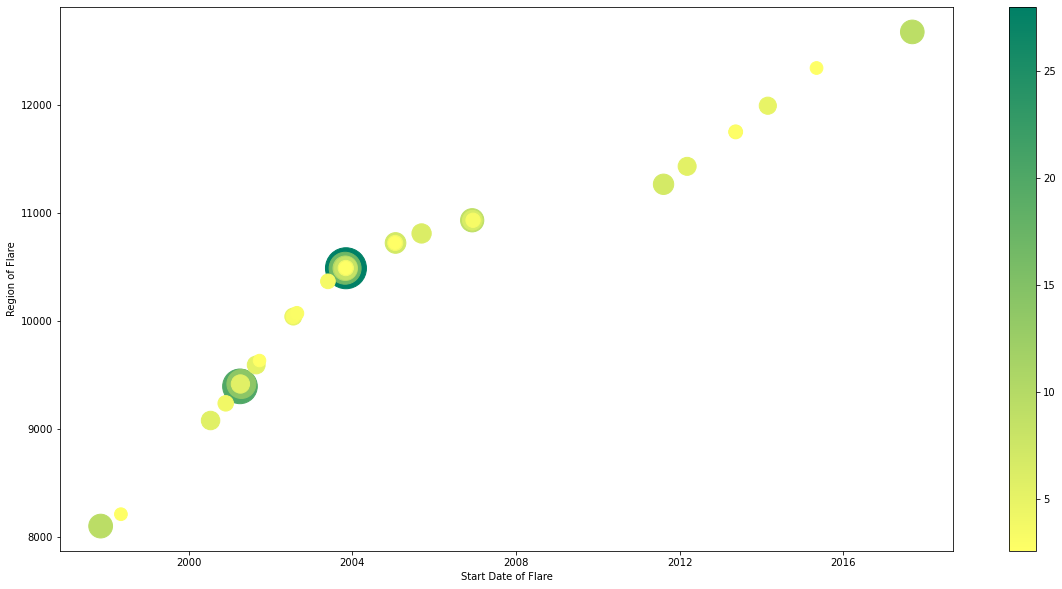

In [90]:
xray = NASAtop50_df["xray_importance"].map(lambda x: float(x[1:]))
NASAtop50_df.plot.scatter(figsize=(20, 10), 
                          x="start_datetime", 
                          y="region",
                          c=xray, 
                          cmap="summer_r", 
                          sharex=False,
                          s=xray*60)
plt.xlabel("Start Date of Flare")
plt.ylabel("Region of Flare")

**We have created a plot that compares the start date of a flare with its region. We have also included the class varaiable in the plot as the size and color. The bigger and darker the point, the larger the class of the flare. We can deduce from this plot that large solar flares (dark green) tend to cluster with smaller solar flares in the same region. As time progresses, the solar flares tend occur in increasingly higher numbered regions.**

### Part 2: Pie plot showing proportion of Flare Halo CMEs in top 50 vs entire data set

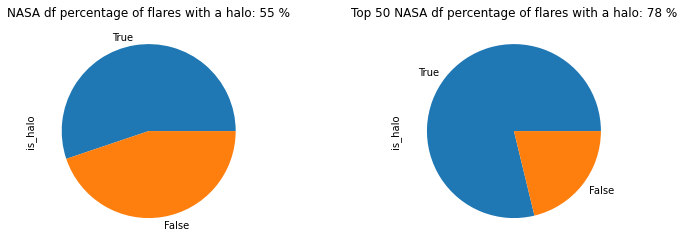

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
df_types = [nasa_df, NASAtop50_df]
name = ["NASA", "Top 50 NASA"]
for ax, df,name in zip(axes,df_types,name):
    df["is_halo"].value_counts().plot.pie(ax=ax)
    is_halo_percentage = (df["is_halo"].value_counts()[1] / (df["is_halo"].value_counts()[1] + df["is_halo"].value_counts()[0])) * 100
    ax.set_title( "%s df percentage of flares with a halo: %d %%" %(name,is_halo_percentage))

**Flares in the top 50 rankings are more likely to have Flare Halo CMEs based on the data that we have collected.**

### Part 3: Scatter plot showing starting, ending frequencies over time

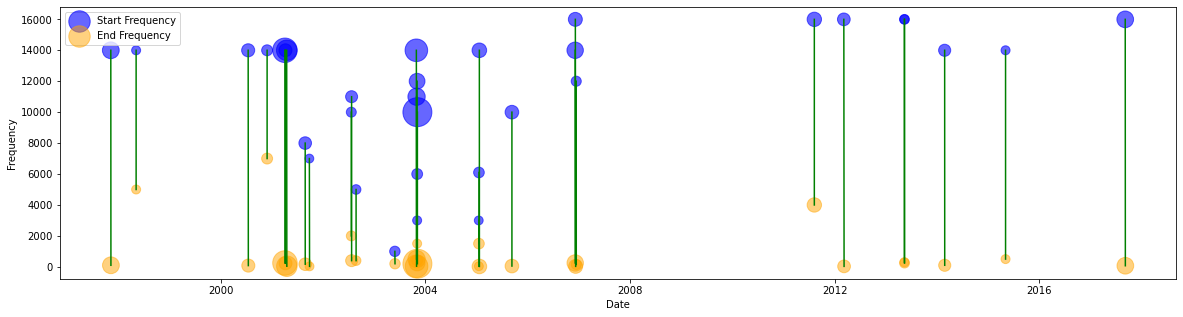

In [92]:
ax = NASAtop50_df.plot.scatter(x="start_datetime", 
                               y="start_freq", 
                               c="Blue", 
                               label="Start Frequency", 
                               sharex=False, 
                               alpha = .6,
                               s=xray*30)

NASAtop50_df.plot.scatter(figsize=(20, 5), 
                          x="end_datetime", 
                          y="end_freq",
                          c="Orange", 
                          label="End Frequency",
                          sharex=False,
                          ax=ax,
                          alpha = .5,
                          s=xray*30)

freq_data = np.array([NASAtop50_df["start_freq"],NASAtop50_df["end_freq"]])
date_data = np.array([NASAtop50_df["start_datetime"], NASAtop50_df["end_datetime"]])
plt.plot(date_data,freq_data,color="green")

plt.xlabel("Date")
plt.ylabel("Frequency")
plt.show()

**This plot maps the starting and ending frequncies of a flare with their start and end date. We wanted to see if flare freqency always followed the trend of going from hight to low. From the data, we see that flares will always start with a higher frequency and end with a lower frequency.**
Help connecting the points gathered gathered from [here](https://stackoverflow.com/questions/35363444/plotting-lines-connecting-points)